In [1]:
import pandas as pd
import re
import numpy as np
import nltk.stem
import pymorphy2
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot
from scipy import sparse
from scipy.sparse import hstack
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('app_review_bugs_train.csv')

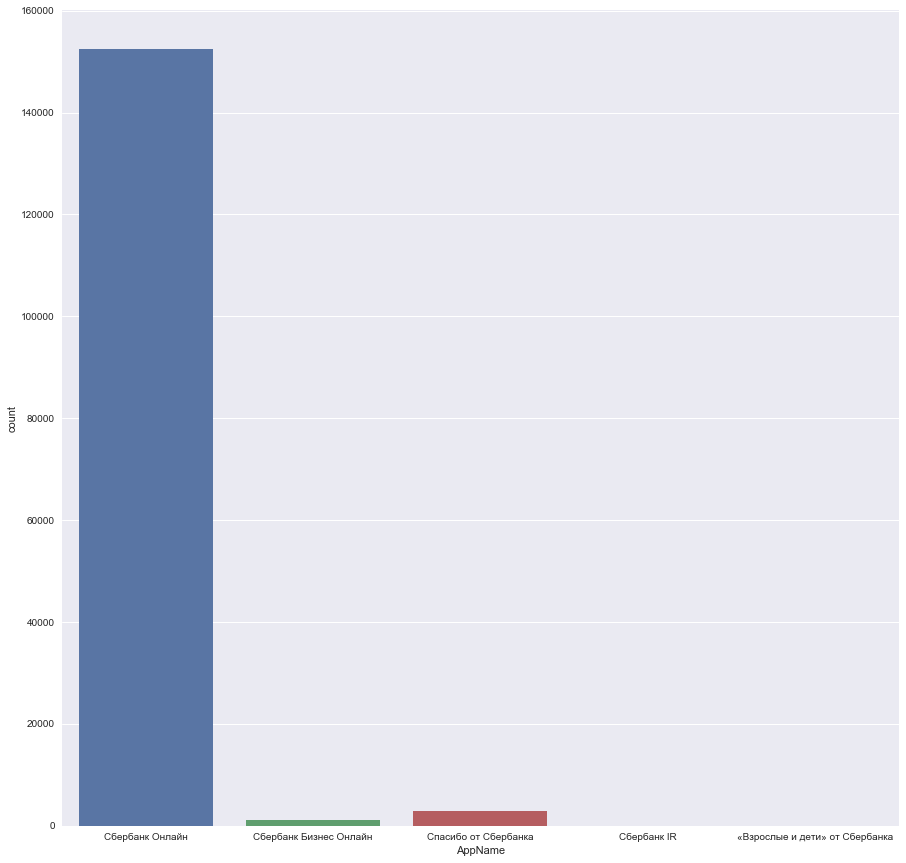

In [3]:
fig, ax = pyplot.subplots(figsize = (15, 15))
sns.countplot(x = 'AppName', data = data, ax = ax)

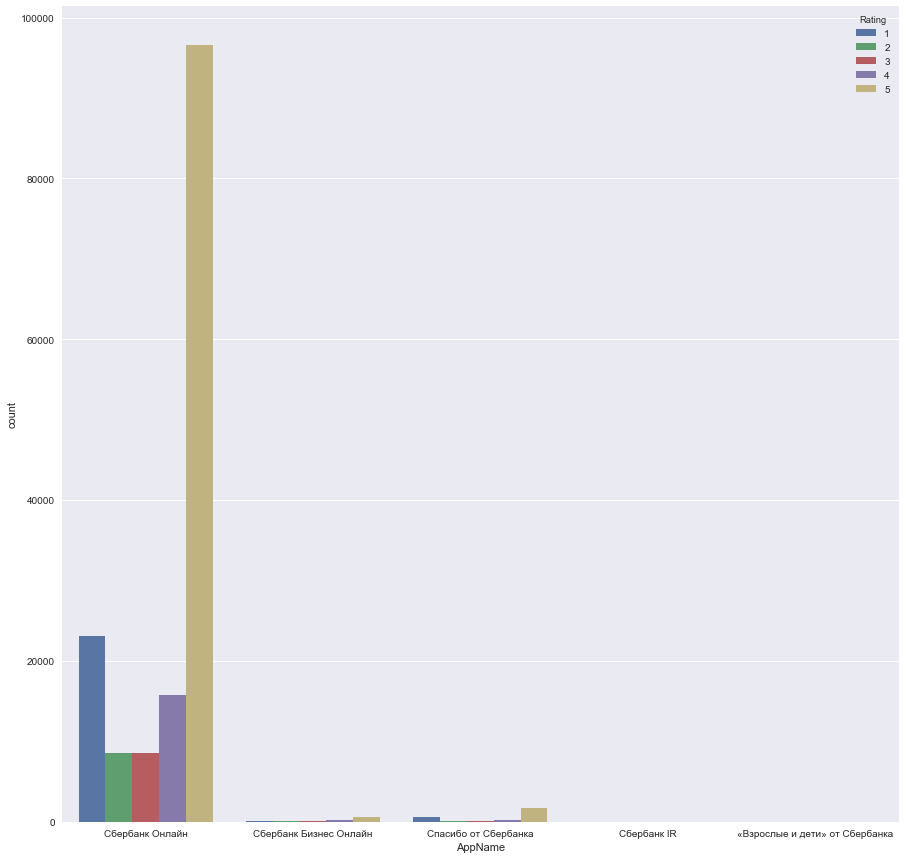

In [4]:
fig, ax = pyplot.subplots(figsize = (15, 15))
sns.countplot(x = 'AppName', hue = 'Rating', data = data, ax = ax)

In [5]:
data.shape

(156390, 8)

In [6]:
data.head()

,Date,AppName,Language,Rating,Title,Review,Device,Device Type
0,2016-10-14,Сбербанк Онлайн,ru,1,Чтоб вас закрыли!,Что в банке что в предложении бардак. На карте...,NaN,NaN
1,2014-12-23,Сбербанк Онлайн,ru,1,NaN,Функциональность практически нулевая. Можно ис...,NaN,NaN
2,2015-07-19,Сбербанк Онлайн,ru,5,Смарт,Супер,NaN,NaN
3,2016-08-18,Сбербанк Онлайн,ru,5,NaN,Хорошее приложение. Все полностью устраивает,NaN,NaN
4,2017-09-19,Сбербанк Онлайн,ru,5,NaN,Удобно,NaN,NaN


In [7]:
data.tail()

,Date,AppName,Language,Rating,Title,Review,Device,Device Type
156385,2017-07-17,Спасибо от Сбербанка,ru,5,NaN,"Норм приложение, ошибок пока не возникало",NaN,NaN
156386,2017-09-08,Сбербанк Онлайн,ru,3,NaN,И это не очень хорошо. Уже почти год по два ра...,NaN,NaN
156387,2015-06-10,Сбербанк Онлайн,ru,5,Все исправили молодсы приложение суппер,Круто,NaN,NaN
156388,2017-10-05,Сбербанк Онлайн,ru,4,NaN,Долго загружается,NaN,NaN
156389,2015-09-30,Сбербанк Онлайн,ru,5,NaN,Замечательное приложение. Все быстро и понятно...,NaN,NaN


In [8]:
for name in data.columns:
    print(name, ': \n', data[name].unique(), len(data[name].unique()))

Date : 
 ['2016-10-14' '2014-12-23' '2015-07-19' ..., '2013-09-12' '2014-10-01'
 '2013-04-23'] 1259
AppName : 
 ['Сбербанк Онлайн' 'Сбербанк Бизнес Онлайн' 'Спасибо от Сбербанка'
 'Сбербанк IR' '«Взрослые и дети» от Сбербанка'] 5
Language : 
 ['ru' 'en' 'es'] 3
Rating : 
 [1 5 3 4 2] 5
Title : 
 ['Чтоб вас закрыли!' nan 'Смарт' ..., 'Автомат' 'С каждым разом хуже!'
 'Все исправили молодсы приложение суппер'] 18578
Review : 
 [ 'Что в банке что в предложении бардак. На карте не может показать где банкоматы. Грузит и грузит потом батс показывает меня на карте и все. Я и сам знаю где я нахожусь.'
 'Функциональность практически нулевая. Можно использовать только шаблоны созданные на сайте. Новых шаблонов в самой программе не создать. Также нельзя сделать платеж без шаблона.'
 'Супер' ..., 'Норм приложение, ошибок пока не возникало'
 'И это не очень хорошо. Уже почти год по два раза пароль вводишь - так и не исправили... :( Оценку снизил до 3*.'
 'Замечательное приложение. Все быстро и поня

In [9]:
for name in ['AppName', 'Language', 'Rating', 'Device Type']:
    print(name, ': \n', data[name].value_counts())

AppName : 
 Сбербанк Онлайн                   152431
Спасибо от Сбербанка                2851
Сбербанк Бизнес Онлайн              1049
«Взрослые и дети» от Сбербанка        45
Сбербанк IR                           14
Name: AppName, dtype: int64
Language : 
 ru    155463
en       890
es        37
Name: Language, dtype: int64
Rating : 
 5    98929
1    23791
4    16270
2     8709
3     8691
Name: Rating, dtype: int64
Device Type : 
 phone     9119
tablet     550
Name: Device Type, dtype: int64


In [9]:
data.groupby('AppName')['Rating'].value_counts()

AppName                         Rating
«Взрослые и дети» от Сбербанка  1            25
                                2             9
                                4             5
                                3             3
                                5             3
Сбербанк IR                     1             9
                                4             2
                                2             1
                                3             1
                                5             1
Сбербанк Бизнес Онлайн          5           622
                                4           234
                                1            88
                                3            59
                                2            46
Сбербанк Онлайн                 5         96562
                                1         23093
                                4         15774
                                3          8503
                                2          8499
С

In [10]:
data.groupby('Device Type')['Rating'].value_counts()

Device Type  Rating
phone        5         6237
             1         1066
             4          894
             3          478
             2          444
tablet       5          382
             1           82
             4           46
             2           21
             3           19
Name: Rating, dtype: int64

In [11]:
for name in data.columns:
    print(name, ': \n', data[name].isnull().value_counts())

Date : 
 False    156390
Name: Date, dtype: int64
AppName : 
 False    156390
Name: AppName, dtype: int64
Language : 
 False    156390
Name: Language, dtype: int64
Rating : 
 False    156390
Name: Rating, dtype: int64
Title : 
 True     115476
False     40914
Name: Title, dtype: int64
Review : 
 False    156252
True        138
Name: Review, dtype: int64
Device : 
 True     146314
False     10076
Name: Device, dtype: int64
Device Type : 
 True     146721
False      9669
Name: Device Type, dtype: int64


In [12]:
#удаление некоторых элементов 'es'
data1 = data.drop([7535, 32103, 51665, 57596, 67069, 76145, 81786, 106207, 122792, 125852, 127660], axis = 0)

In [13]:
# все категории которые не "сбербанк онлайн" переименоваются в "не сбербанк онлайн"
data1.ix[list(data1[data1['AppName'] != 'Сбербанк Онлайн'].index), ['AppName']] = 'не Сбербанк Онлайн' 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [14]:
#кодирование мешок слов признака AppName
data1['Сбербанк Онлайн'] = data1['AppName'].apply(lambda x: 1 if x == 'Сбербанк Онлайн' else 0)
#data1['не Сбербанк Онлайн'] = data1['AppName'].apply(lambda x: 1 if x != 'Сбербанк Онлайн' else 0)

In [15]:
#кодирование мешок слов признака Device Type по принципу указали или нет 
data1['указано Device Type'] = data1['Device Type'].isnull().apply(lambda x: 1 if not x else 0)
#data1['не указано Device Type'] = data1['Device Type'].isnull().apply(lambda x: 1 if x else 0)

In [16]:
data_ru = data1[data1['Language'] != 'en']
data_en = data1[data1['Language'] == 'en']

data_title_ru = data_ru[data_ru['Title'].isnull() == False].drop(['Date', 'Language', 'AppName', 'Device Type', 'Device', 'Review'], 
                                                                axis = 1)
data_review_ru = data_ru[data_ru['Review'].isnull() == False].drop(['Date', 'Language', 'AppName', 'Device Type', 'Device', 'Title'], 
                                                                 axis = 1)

#приведение к нижнему регистру и удаление пропусков в конце
data_title_ru['Title'] = data_title_ru['Title'].apply(lambda line: line.lower().strip())
data_review_ru['Review'] = data_review_ru['Review'].apply(lambda line: str(line).lower().strip())

#создание нового признака количества слов в Review
data_review_ru['n_words_review'] = list(map(lambda x: len(re.split(' ', x)), data_review_ru['Review']))
data_title_ru['n_words_title'] = list(map(lambda x: len(re.split(' ', x)), data_title_ru['Title']))

review_ru = data_review_ru['Review']
title_ru = data_title_ru['Title']


data_title_ru = data_title_ru.drop('Title', axis = 1)
data_review_ru = data_review_ru.drop('Review', axis = 1)

print(data_title_ru.shape, data_review_ru.shape)

(40592, 4) (155352, 4)


In [17]:
data_title_ru['!'] = title_ru.apply(lambda x: len(re.findall('[!]', x)))
data_title_ru[')'] = title_ru.apply(lambda x: len(re.findall('[)]', x)))
data_title_ru['('] = title_ru.apply(lambda x: len(re.findall('[(]', x)))
data_title_ru['?'] = title_ru.apply(lambda x: len(re.findall('[?]', x)))

data_review_ru['!'] = review_ru.apply(lambda x: len(re.findall('[!]', x)))
data_review_ru[')'] = review_ru.apply(lambda x: len(re.findall('[)]', x)))
data_review_ru['('] = review_ru.apply(lambda x: len(re.findall('[(]', x)))
data_review_ru['?'] = review_ru.apply(lambda x: len(re.findall('[?]', x)))

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
#lines_list = tokenize.sent_tokenize(paragraph)
sid = SentimentIntensityAnalyzer()
#sentences.extend(lines_list)
sid.polarity_scores(review_ru[0])

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [43]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [19]:
class LemStemVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        return lambda doc: (rus_stemmer.stem(morph.parse(w)[0].normal_form) for w in analyzer(doc) if len((rus_stemmer.stem(morph.parse(w)[0].normal_form))) > 2)

stop = set(stopwords.words('russian'))
stop = stop.difference(('не','хорошо', 'более', 'больше', 'лучше', 'нельзя', 'зачем', 'наконец', 'опять')) #убрать из стоп слов
rus_stemmer = nltk.stem.SnowballStemmer('russian')
morph = pymorphy2.MorphAnalyzer(path = 'D:\Anaconda3\Lib\site-packages\pymorphy2_dicts_ru\data', lang='ru')

In [20]:
title_ru = title_ru.apply(lambda x: x.replace('_', ' '))
review_ru = review_ru.apply(lambda x: x.replace('_', ' '))
title_ru = title_ru.apply(lambda x: x.replace('не ', 'не_'))
review_ru = review_ru.apply(lambda x: x.replace('не ', 'не_'))

In [21]:
del(data1, data, data_en)

In [22]:
delite = set({'.', ':-', 'сбербанк', 'приложения', 'приложение', 'банк', 'онлайн', ',', ':', '#', '@', '*', '£', '€', '$',
    '%', '&', ';', '^', '=', '№','рублей', 'рубль', 'деньги', 'руб', 'сбер', '!', '?', 'этот', ' _ ', '_ ', ' _', 'это', '-', 
              'мб/с', 'сб-онлайн', '"', 'чет', 'как','короч', 'короче', 'крч', 'sberbank', 'sber', '0мб', '0мбит', 
              '0руб', '0рубл', '1ml', '1гб', '1го', '1раз', '2гб', '2го', '2год', '2раз', '3pro', '3гб', '3го', '3раз', 
              '4pda', '4pro', '4го', '4пд', '4раз', '5го', '5ка', '5ти', '6го',  'alph', 'compact', 'cуперет', 
              'desir', 'dua', 'edg', 'fingerprint', 'gud', 'gut', 'highscre', 'honor', 'klass', 'lte', 'min', 'nic', 
              'not', 'onlin', 'otlichn', 'pro', 'push', 'redm', 'sms', 'son', 'alph', 'cуперет',  'dua', 'edg', 'highscre', 
              'min', 'nic', 'not', 'onlin', 'otlichn', 'redm', 'son', 'tab', 'ver', 'wif' , 'zte', 
             'алекс', 'александр'})

phone = ['android', 'galax', 'htc', 'ios', 'nexus', 'nfc','xiaomi', 'samsung', 'андроид', 'duos', 'app', 'asus',
         'huawei' , 'htc', 'megafonl', 'galaxy', 'lenovo', 'ios', 'мейзу', 'xiaomi', 'fly', 'айфон', 'андройд', 'zenfon', 
         'iphon', 'самсунг', 'meizu', 'планшет', 'xper', 'alcatel', 'ipad']


d = {'super': 'cупер',
     'ok': 'хорошо',
    ' ок ': 'хорошо',
    'збс' : 'отлично',
    'уф': 'плохо',
    'cool': 'отлично',
    'норм': 'нормально',
    'root': 'рут',
    'good':'хорошо',
    'гуд':'хорошо',
    'нормуль': 'нормально',
    "+": ' плюс ',
    'great': 'отлично',
    'мне_': ' '}



stop = stop.union(delite)

d.update(dict((i, '_устройство_') for i in phone))

#замена в текстк значений из ключей d на значение по ключу
def sub_line(line):
    for k in d.keys():
        line = line.replace(k, d[k])
    return line


def o_subs(line): #ЛУЧШЕ ЧЕРЕЗ РЕКУРСИЮ СДЕЛАТЬ
    t = True
    while 'оо' in line:
        line = line.replace('оо', 'о')
    return line

In [23]:
title_ru =  list(map(lambda x: o_subs(sub_line(re.sub('\w\d{1}', ' ', x))), title_ru))

vectorizer_title_1 = LemStemVectorizer(stop_words = stop, decode_error = 'ignore', ngram_range = (1, 1), min_df = 5)
vectorizer_title_1.fit(title_ru)
X_title = vectorizer_title_1.transform(title_ru)

#представление через дата-фрейм
#X_title = pd.DataFrame(X_title.toarray(), columns = vectorizer_title_1.get_feature_names(), index = data_title_ru.index) 

print(vectorizer_title_1.get_feature_names()[:35])
print(X_title.shape)

['_устройство_', '_устройство_н', 'alph', 'cуперет', 'dua', 'edg', 'highscre', 'min', 'nic', 'not', 'onlin', 'otlichn', 'redm', 'son', 'ver', 'wif', 'wtf', 'абсолютн', 'аванс', 'автоплатеж', 'автоповорот', 'автор', 'авторизац', 'адверт_устройство_', 'адекватн', 'аккумулятор', 'алекс', 'андр', 'антивирус', 'баг', 'баланс', 'балл', 'банк', 'банкинг', 'банковск']
(40592, 1058)


In [24]:
vec_title = vectorizer_title_1.get_feature_names()
del(title_ru)#,  vectorizer_title_1)

In [25]:
from sklearn.model_selection import train_test_split
Y_title = data_title_ru['Rating']

#объединение через дата-фрейм
#X_title = X_title.join(data_title_ru.drop('Rating', axis = 1))


X_title = hstack((X_title, sparse.csr_matrix(data_title_ru.drop('Rating', axis = 1))))
X_train, X_test, Y_train, Y_test = train_test_split(X_title, Y_title, test_size = 0.2) 

print(X_test.shape, X_train.shape, X_title.shape, Y_title.shape)

(8119, 1065) (32473, 1065) (40592, 1065) (40592,)


In [26]:
del(X_title, Y_title,  data_title_ru)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.64244365069589848

In [28]:
del(X_train, Y_train, X_test, Y_test, lr)

In [29]:
review_ru = list(map(lambda x: o_subs(sub_line(re.sub('\w\d{1}', ' ', x))), review_ru)) 

vectorizer_review_1 = LemStemVectorizer(stop_words = stop, decode_error = 'ignore', ngram_range = (1, 1), min_df = 25,
                                            lowercase = False)
vectorizer_review_1.fit(review_ru)
X_review = vectorizer_review_1.transform(review_ru)

#представление через дата-фрейм
#X_review = pd.DataFrame(X_review.toarray(), columns = vectorizer_review_1.get_feature_names(), index = data_review_ru.index) 

print(vectorizer_review_1.get_feature_names()[:35])
print(X_review.shape)

['_устройство_', '_устройство_е_', '_устройство_е_вс', '_устройство_е_можн', '_устройство_л', '_устройство_м', '_устройство_н', 'cуперет', 'dua', 'edg', 'expla', 'globus', 'googl', 'gps', 'market', 'max', 'min', 'miu', 'mobil', 'nic', 'norm', 'not', 'phon', 'pla', 'prim', 'qiw', 'redm', 'sim', 'son', 'upd', 'ver', 'web', 'wif', 'windows', 'абонент']
(155352, 2345)


In [30]:
vec_review = vectorizer_review_1.get_feature_names()
del(review_ru, vectorizer_review_1, stop)

In [31]:
from sklearn.model_selection import train_test_split
Y_review = data_review_ru['Rating']


#объединение через дата-фрейм
#X_review = X_review.join(data_review_ru.drop('Rating', axis = 1)) 

X_review = hstack((X_review, sparse.csr_matrix(np.array(data_review_ru.drop('Rating', axis = 1)))))

X_train, X_test, Y_train, Y_test = train_test_split(X_review, Y_review, test_size = 0.2)

print(X_test.shape, X_train.shape, X_review.shape, Y_review.shape)

(31071, 2352) (124281, 2352) (155352, 2352) (155352,)


In [32]:
del(data_review_ru)#, X_review, Y_review)

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.73505841459882204

In [34]:
del(X_train, Y_train, X_test, Y_test, lr)

In [35]:
#создание признаков, которые есть в review, но нет в title, анализ текста title через review и присоединение к массиву title
title_names_1 = []

for i, name in enumerate(vec_review):
    if name in vectorizer_title_1.get_feature_names():
        continue
    else:
        title_names_1.append(i)
               
#new_review = pd.DataFrame(vectorizer_title_1.transform(review_ru)[:,title_names_1].toarray(), 
#                          columns = np.array(vectorizer_title_1.get_feature_names())[title_names_1], index = X_review.index)

new_review = vectorizer_title_1.transform(review_ru)[:,title_names_1]

print(title_names_1)
print(new_review.shape)
new_review

NameError: name 'review_ru' is not defined

In [ ]:
del(vectorizer_title_1, vec_review, title_names_1)

In [ ]:
from sklearn.model_selection import train_test_split
#X_review = X_review.join(new_review) 

X_review = hstack((X_review, new_review))

X_train, X_test, Y_train, Y_test = train_test_split(X_review, Y_review, test_size = 0.2)

print(X_test.shape, X_train.shape, X_review.shape, Y_review.shape)

In [ ]:
del(X_review)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)